# Research on connectivity between neurons in the brain and in the VNC

As there is already papers studying interconnectivity in brain neurons and in VNC neurons, I tried to study the connections between the 2. And to do that I first focus on the first connections between the brain and the VNC. Here's scheme (focusing on the red arrows) :

<center><img src='images/neurons_interconnectivity.png'/></center>

## I - Get data of connections

First step is to get the data of direct connections from the brain to the VNC. To do that I used the code provided and added some other functions in `utils.py` to help me.

In [1]:
import utils
from vnc_networks.vnc_networks.connectome_reader import MANC
from vnc_networks.vnc_networks.connections import Connections
import matplotlib.pyplot as plt
import pandas

In [1]:
#If you only use the dataset.csv you don't need to run this !

# Load the connections in the VNC from the MANC dataset
CR = MANC('v1.2')
vnc = Connections(CR = CR)

NameError: name 'MANC' is not defined

In [5]:
# Can specify a side or a target like so :
# side = 'RHS' right hand side, can also be 'LHS'
# target = 'fl' front leg, can also be 'ml' or 'hl'

# We take descending neurons as input, we can specify a type since it can be a lot of neurons else
input_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'descending', # descending neuron
        'type': 'DNg11', # a specific name
    }
)

ascending_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'ascending',

    })
print(f"Found {len(input_neurons)} descending neurons")
print(f"Found {len(ascending_neurons)} ascending neurons")

Found 6 descending neurons
Found 1849 ascending neurons


In [4]:
# Create a new graph with the connections that we want
subnetwork = vnc.subgraph_from_paths(
    source = input_neurons,
    target = ascending_neurons,
    n_hops = 1, # specifying 1 gives only direct connections
    keep_edges = 'direct',
)

Attribute class_1 not found in the graph. Adding it.


In [5]:
# print the data with the connections
utils.show_data_connections(subnetwork)

Attribute name not found in the graph. Adding it.


,source_body_ids,source_name,source_class,target_body_id,target_name,target_class,syn_count,eff_weights
0,23026,[DNxn014],[descending],11741,[ANXXX023],[ascending],79,-79
1,23026,[DNxn014],[descending],12578,[AN07B032],[ascending],14,-14
2,23026,[DNxn014],[descending],13062,[AN02A017],[ascending],5,-5
3,23026,[DNxn014],[descending],21841,[AN19B060],[ascending],11,-11
4,23688,[DNxn014],[descending],10322,[AN07B003],[ascending],5,-5
5,23688,[DNxn014],[descending],13691,[AN07B032],[ascending],14,-14
6,23688,[DNxn014],[descending],16700,[AN19B059],[ascending],5,-5
7,23688,[DNxn014],[descending],100314,[ANXXX023],[ascending],45,-45
8,24332,[DNxn014],[descending],10294,[AN07B003],[ascending],8,-8
9,24332,[DNxn014],[descending],11741,[ANXXX023],[ascending],66,-66


## II - Results


I have generated the data in ```dataset.csv``` which should be in the folder. You can then retrieve it in a pandas dataframe.

In [2]:
df = pandas.read_csv("dataset.csv")

### How to use it :
1 - Get simple information for a particular type (for all possible types you can refer to the list in ```utils.list_name```), for exemple we take 'DNfl010'



In [4]:
# Average number of synapses and standard deviation
mean, std = utils.get_syn_info(df,'DNfl010')
print(mean,std)

15.271028037383177 13.361756156159824


In [5]:
#Average weight of the connections, often they will be the same because weight is the same magnitude as the synapses but negative or positive depending on the type of connections.
mean_weight = utils.get_weight_info(df,'DNfl010')
print(mean_weight)

15.271028037383177


In [6]:
# Get how many neurons of a particular class a type of neurons targets, you can have all the classes in utils.target_class_list
nb_ascending_neurons = utils.get_nb_neurons_target(df,'DNfl010','ascending')
print(nb_ascending_neurons)

#'DNfl010' type have direct connections to 67 ascending neurons

67


In [7]:
#Get the number of total synapses are used to connect to a particular class
nb_synapses_ascending = utils.get_nb_syn_target(df,'DNfl010','ascending')
print(nb_synapses_ascending)
#1176 synapses are used to target ascending neurons

1176


### 2 - Plot the data

2.1 - Plot average number of synapses per neurons in a certain type


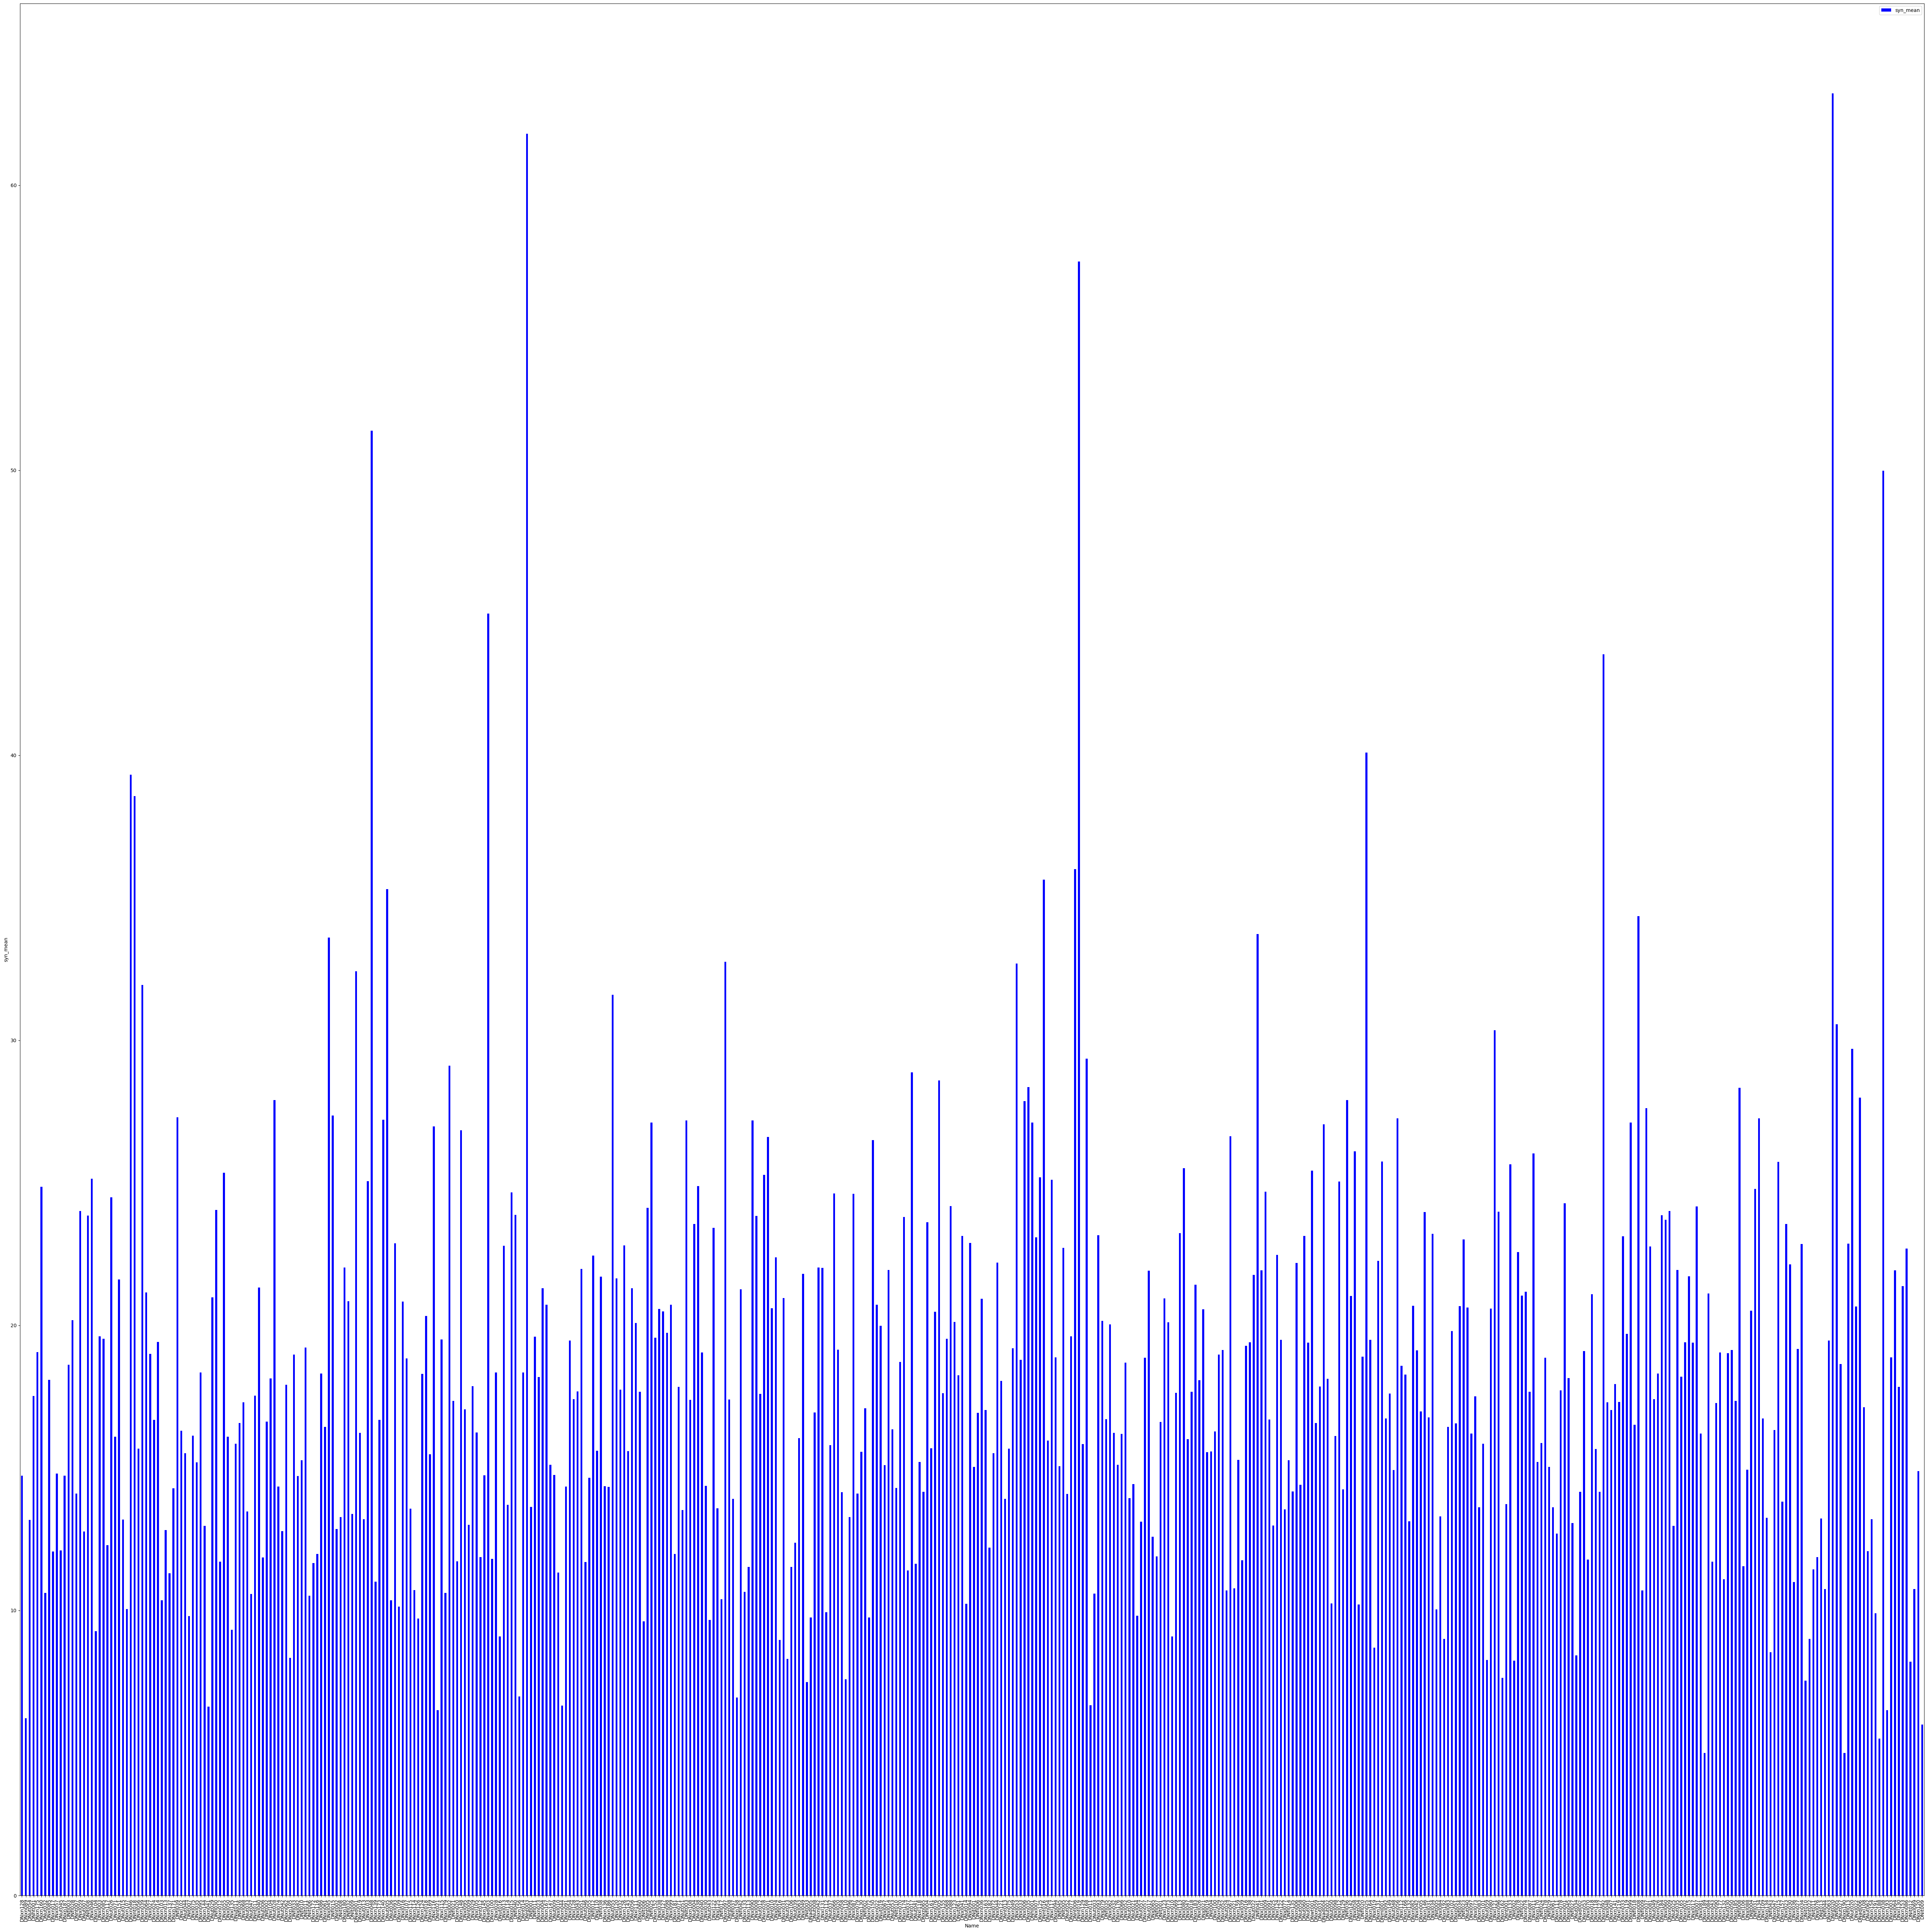

In [8]:
# Unsorted plot of average number of synapses
p = utils.plot_source_syn_mean_or_std(df,'mean')

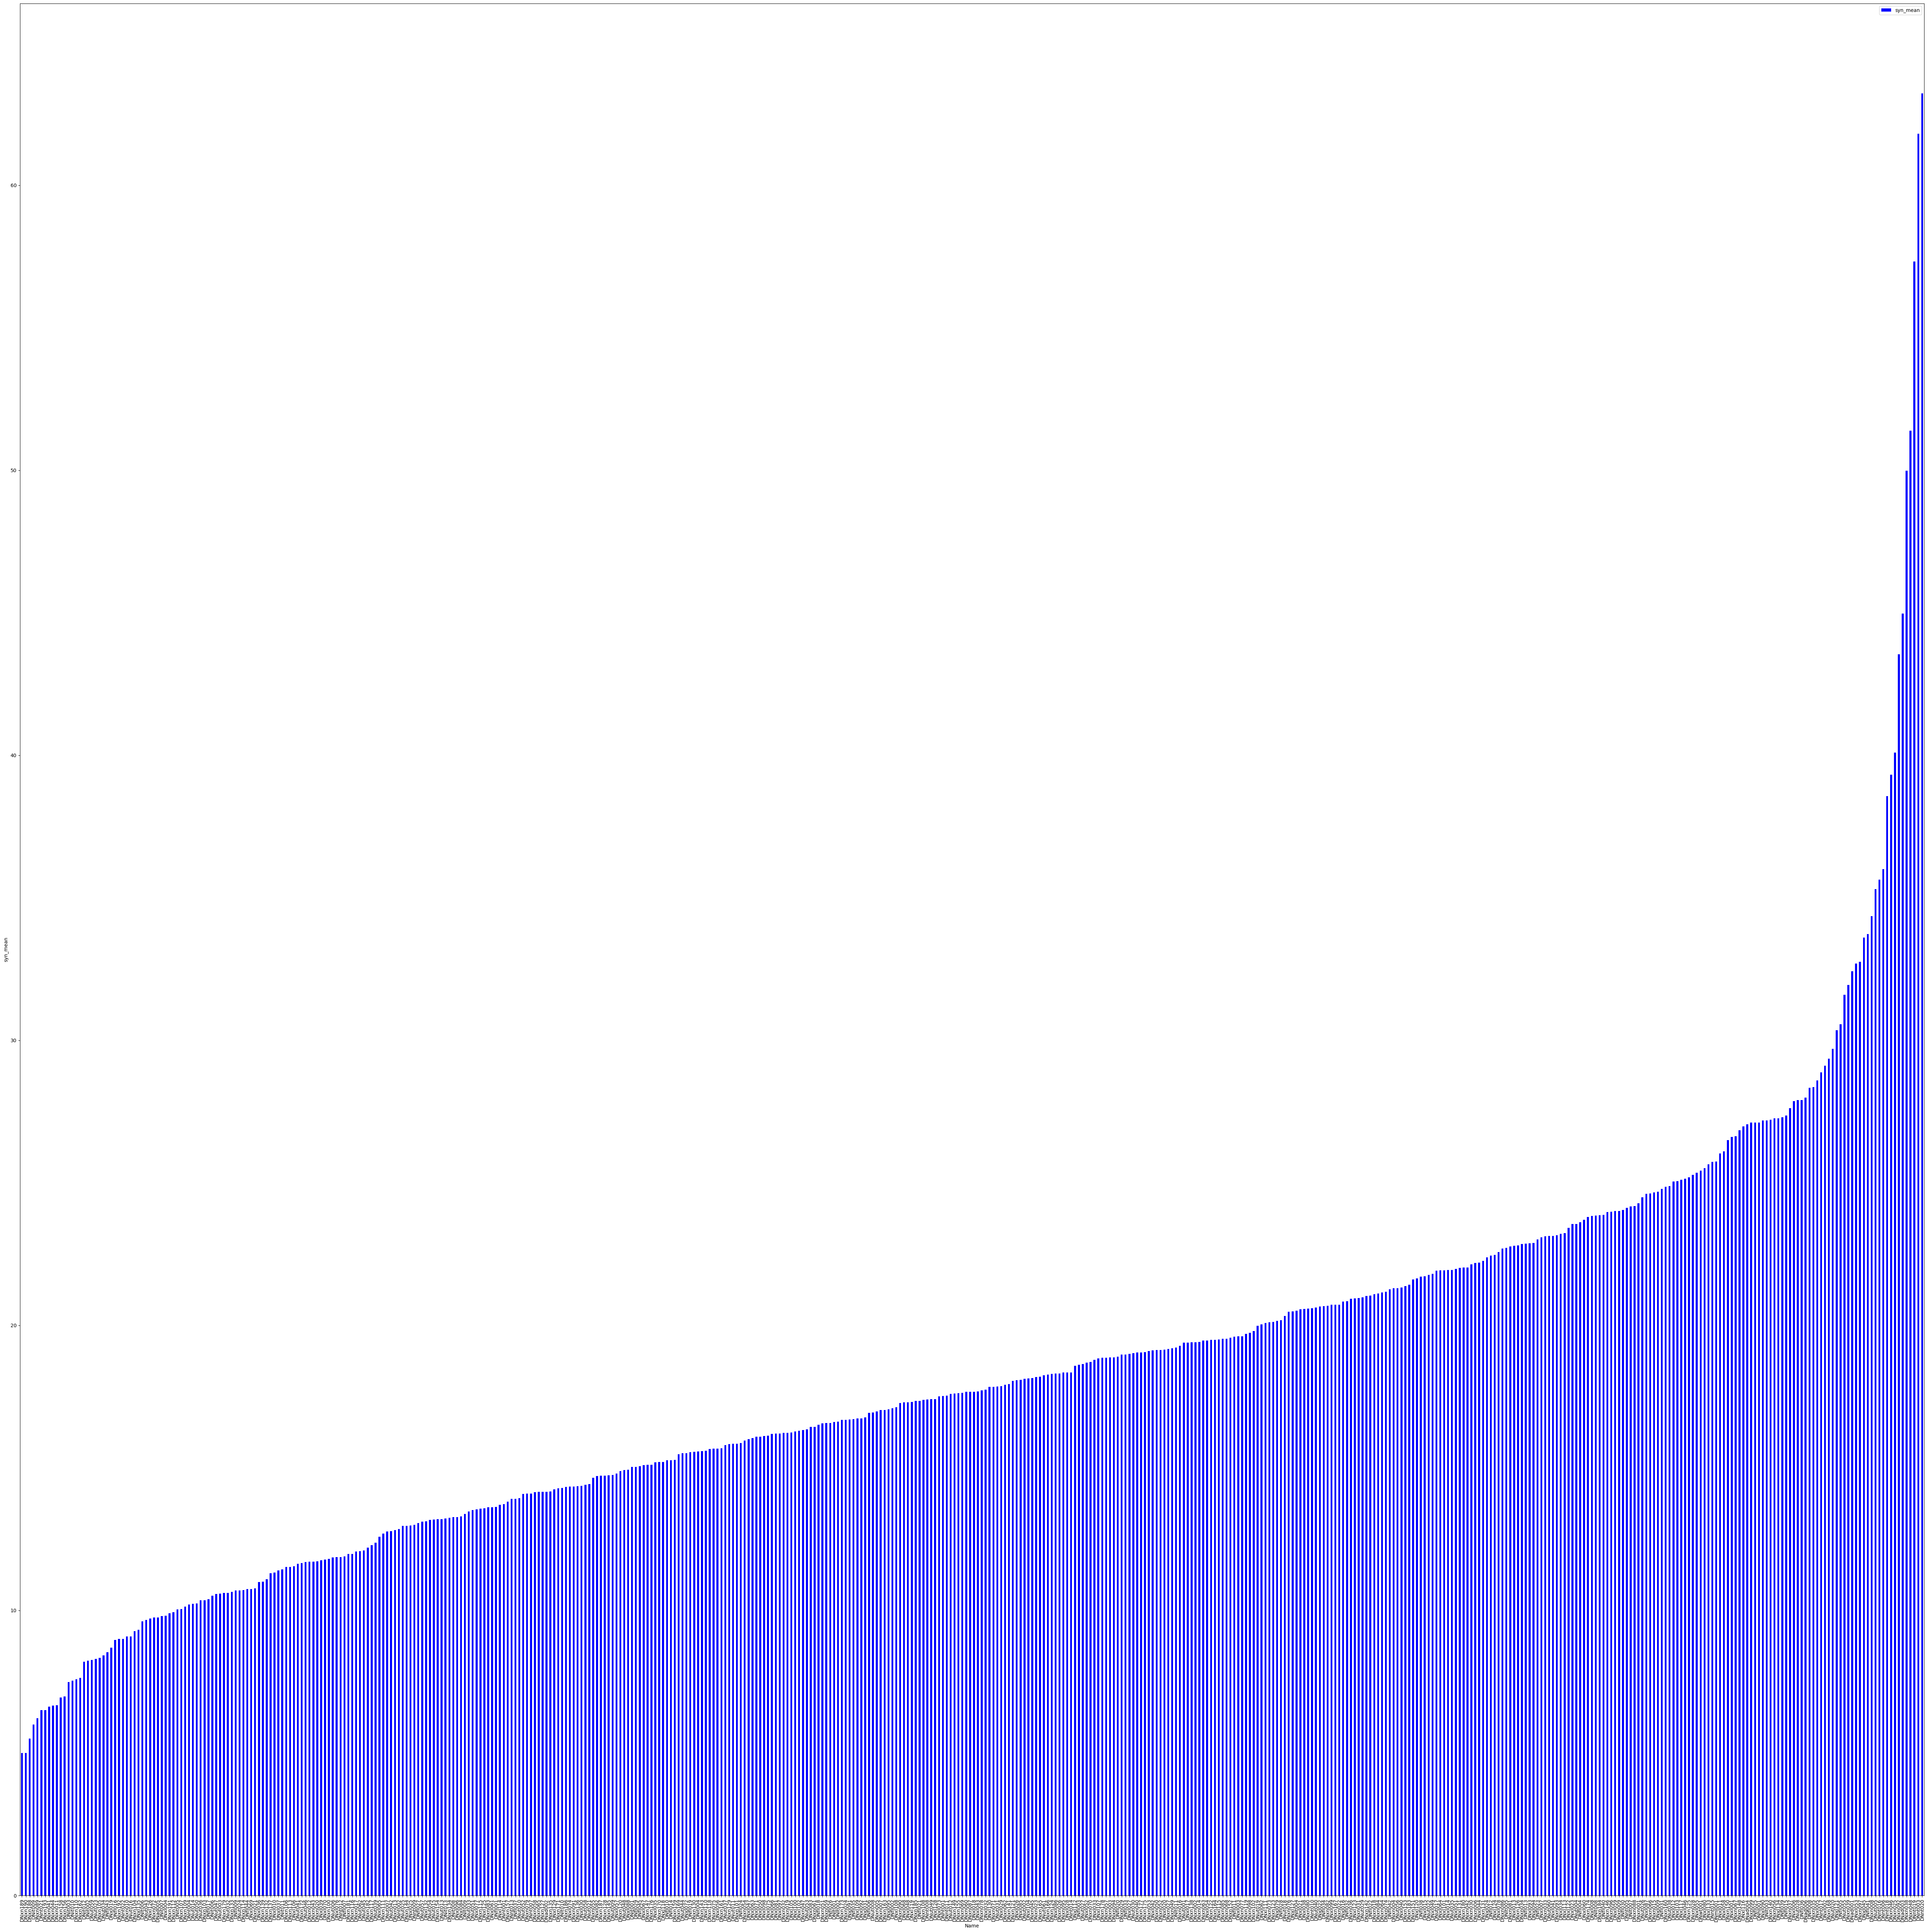

In [9]:
#Sorted plot of average number of synapses
p = utils.plot_source_syn_mean_or_std(df,type = 'mean',sort_type='mean')

* You can replace 'mean' by 'std' in type, it will plot the std instead of the mean
* For sorting, you can either don't sort it (default), by mean : sort_type = 'mean' or by std : sort_type = 'std'

2.2 Plotting average weight distribution

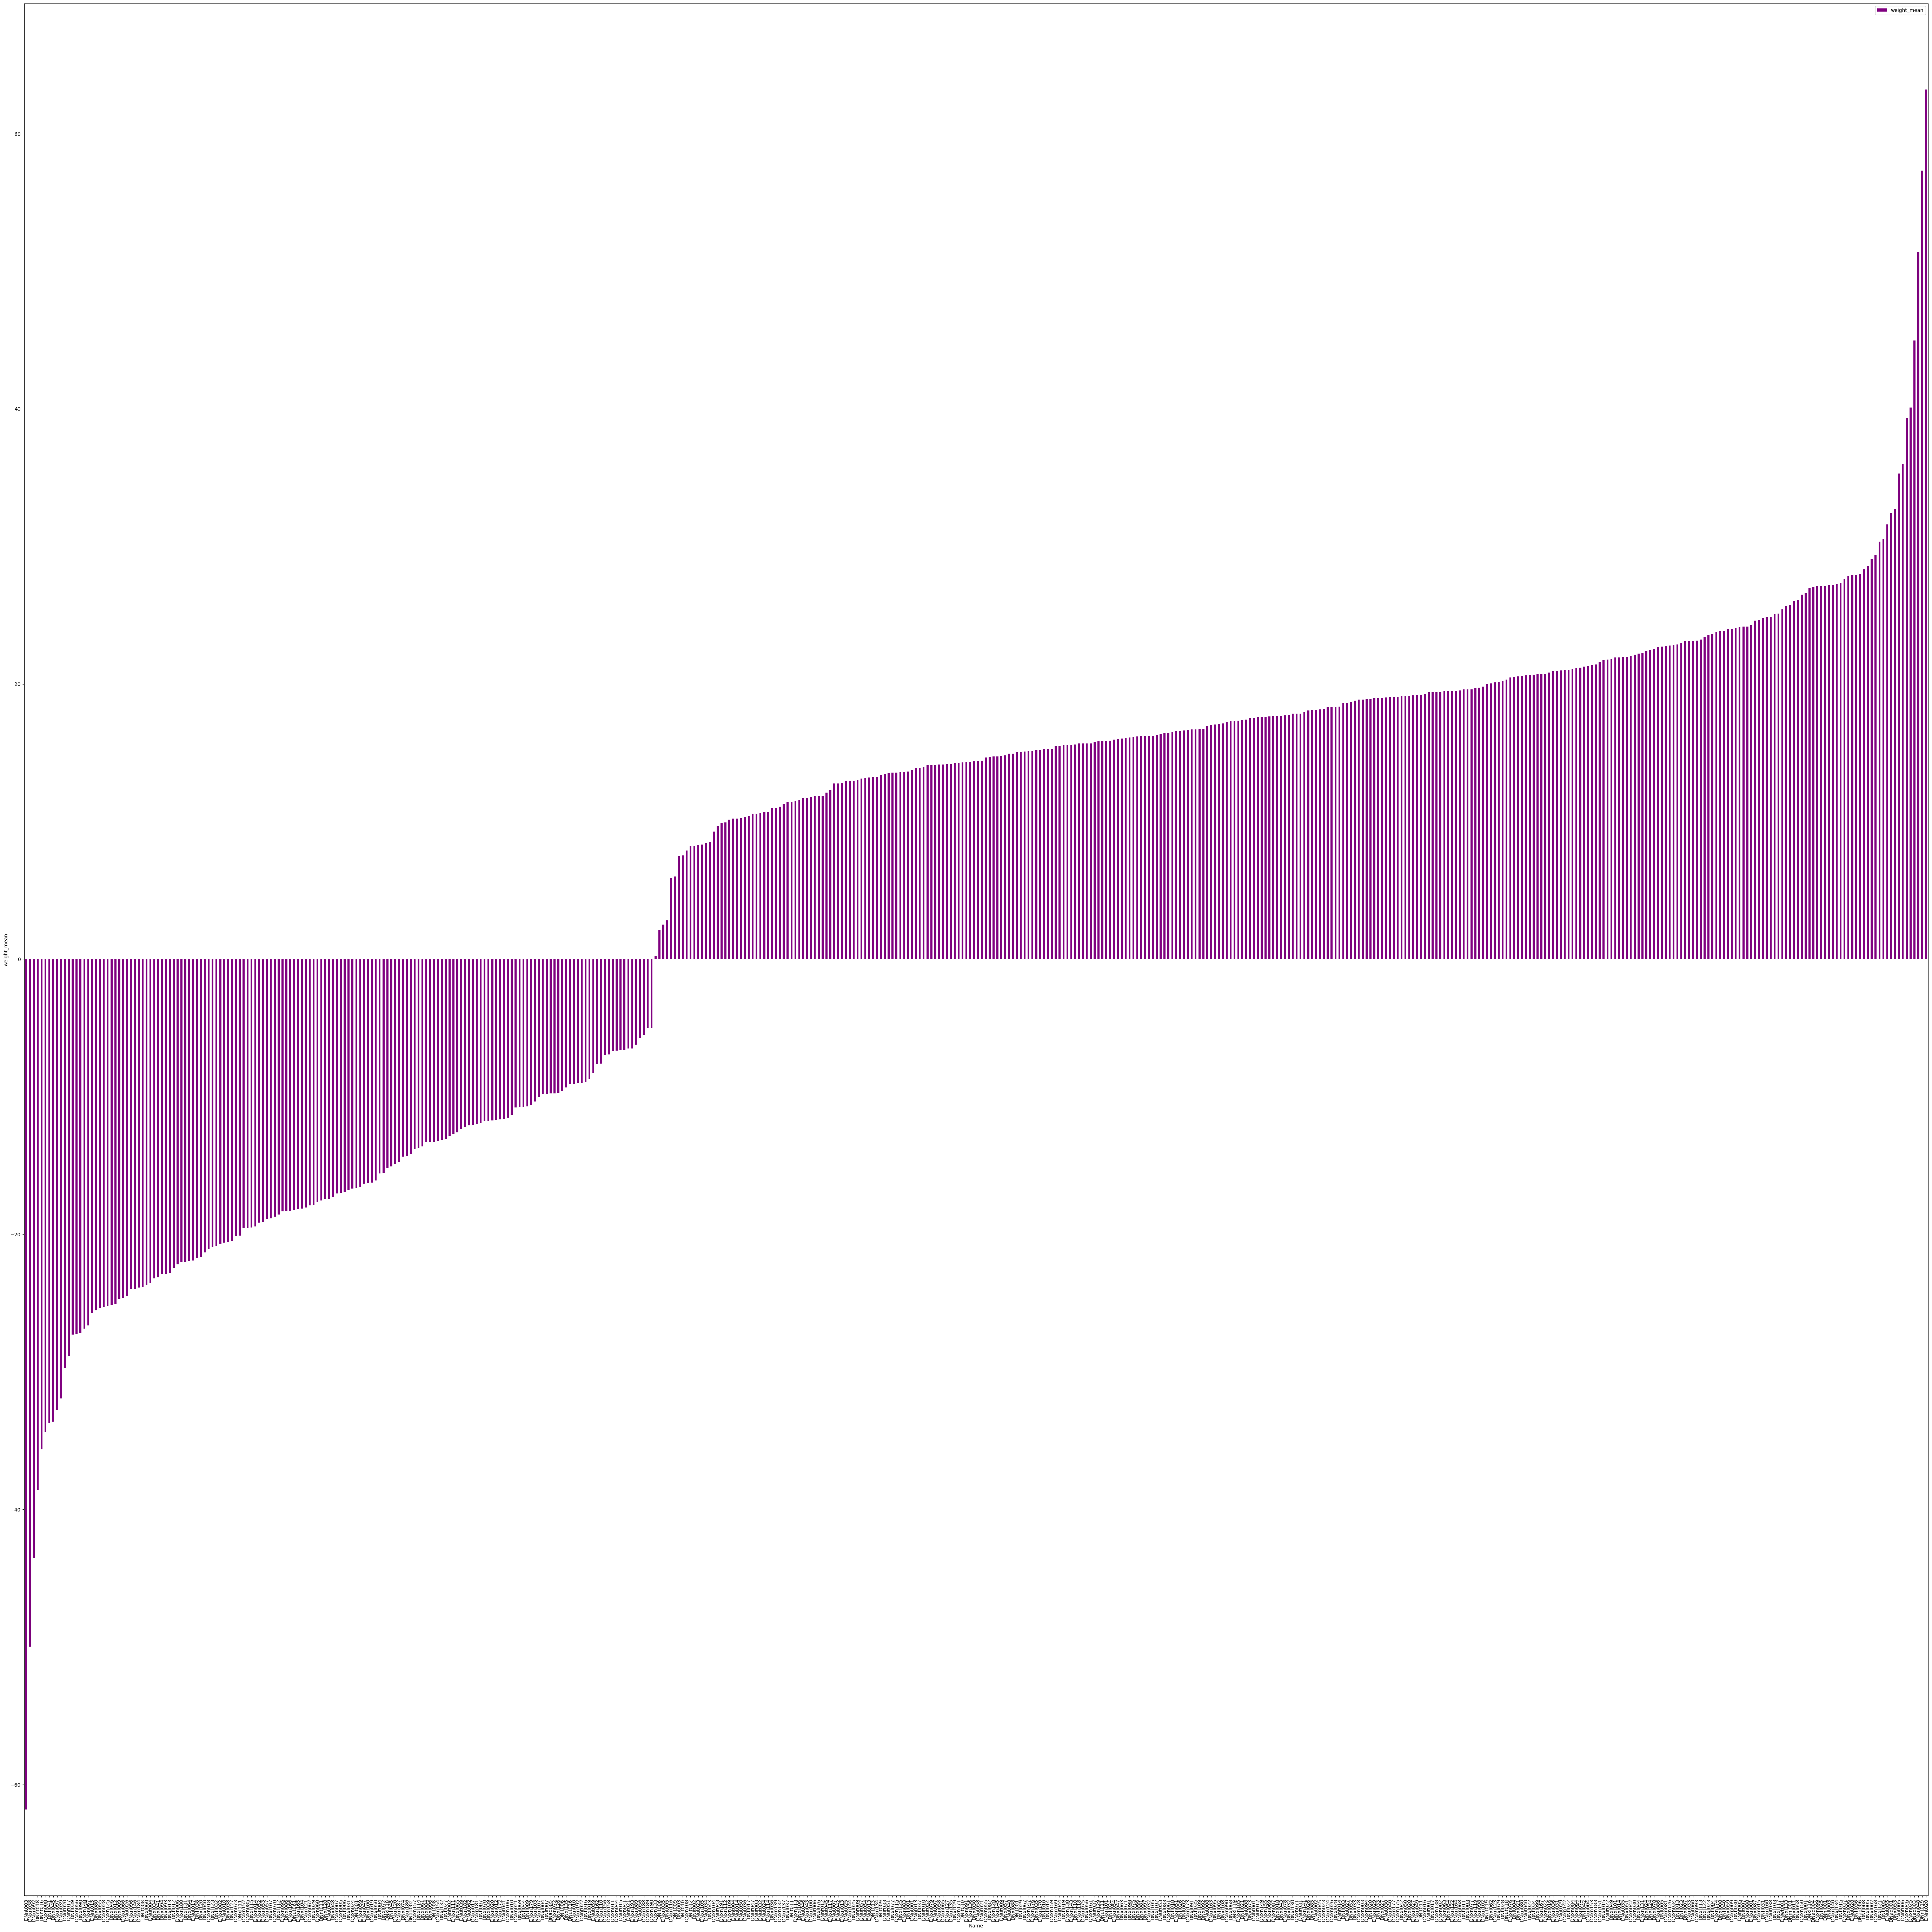

In [10]:
p = utils.plot_weight_distribution(df,sort_type='mean')

2.3 Plot target class repartition for a specific type, e.g 'DNfl010'

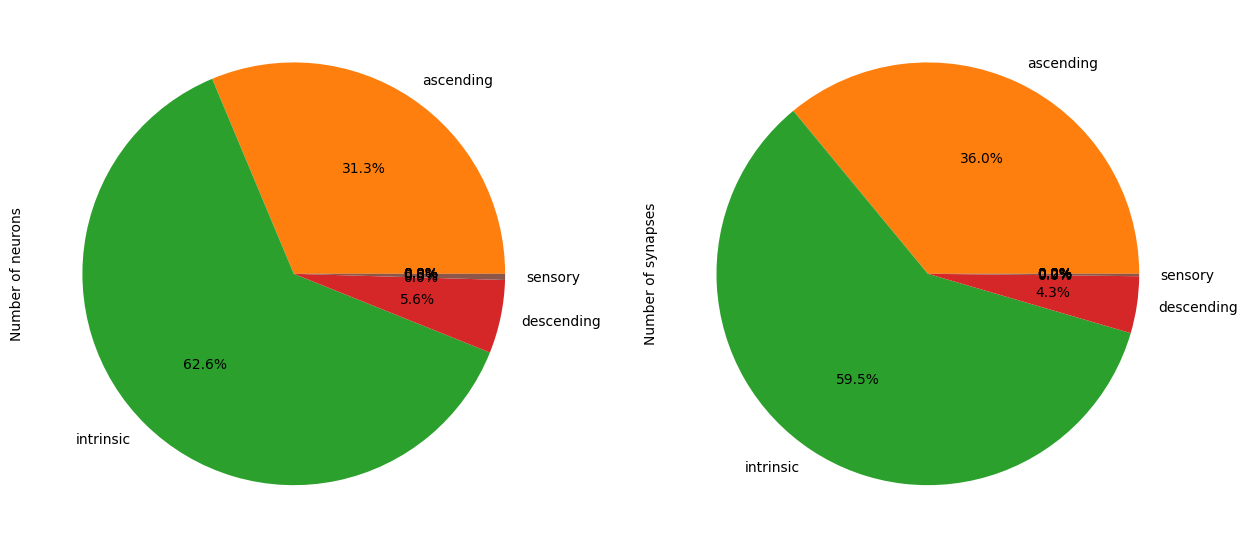

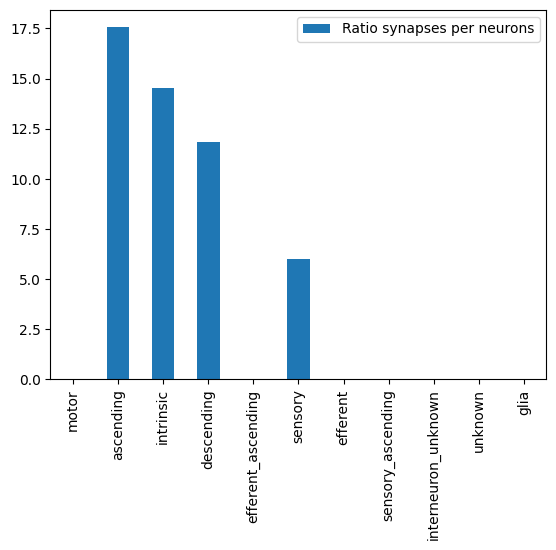

In [4]:
p = utils.plot_repartition(df,'DNfl010')
p = utils.plot_ratio_syn_per_class(df,'DNfl010')

2.4 Plot number of descending neurons type that connect to neurons types in the vnc

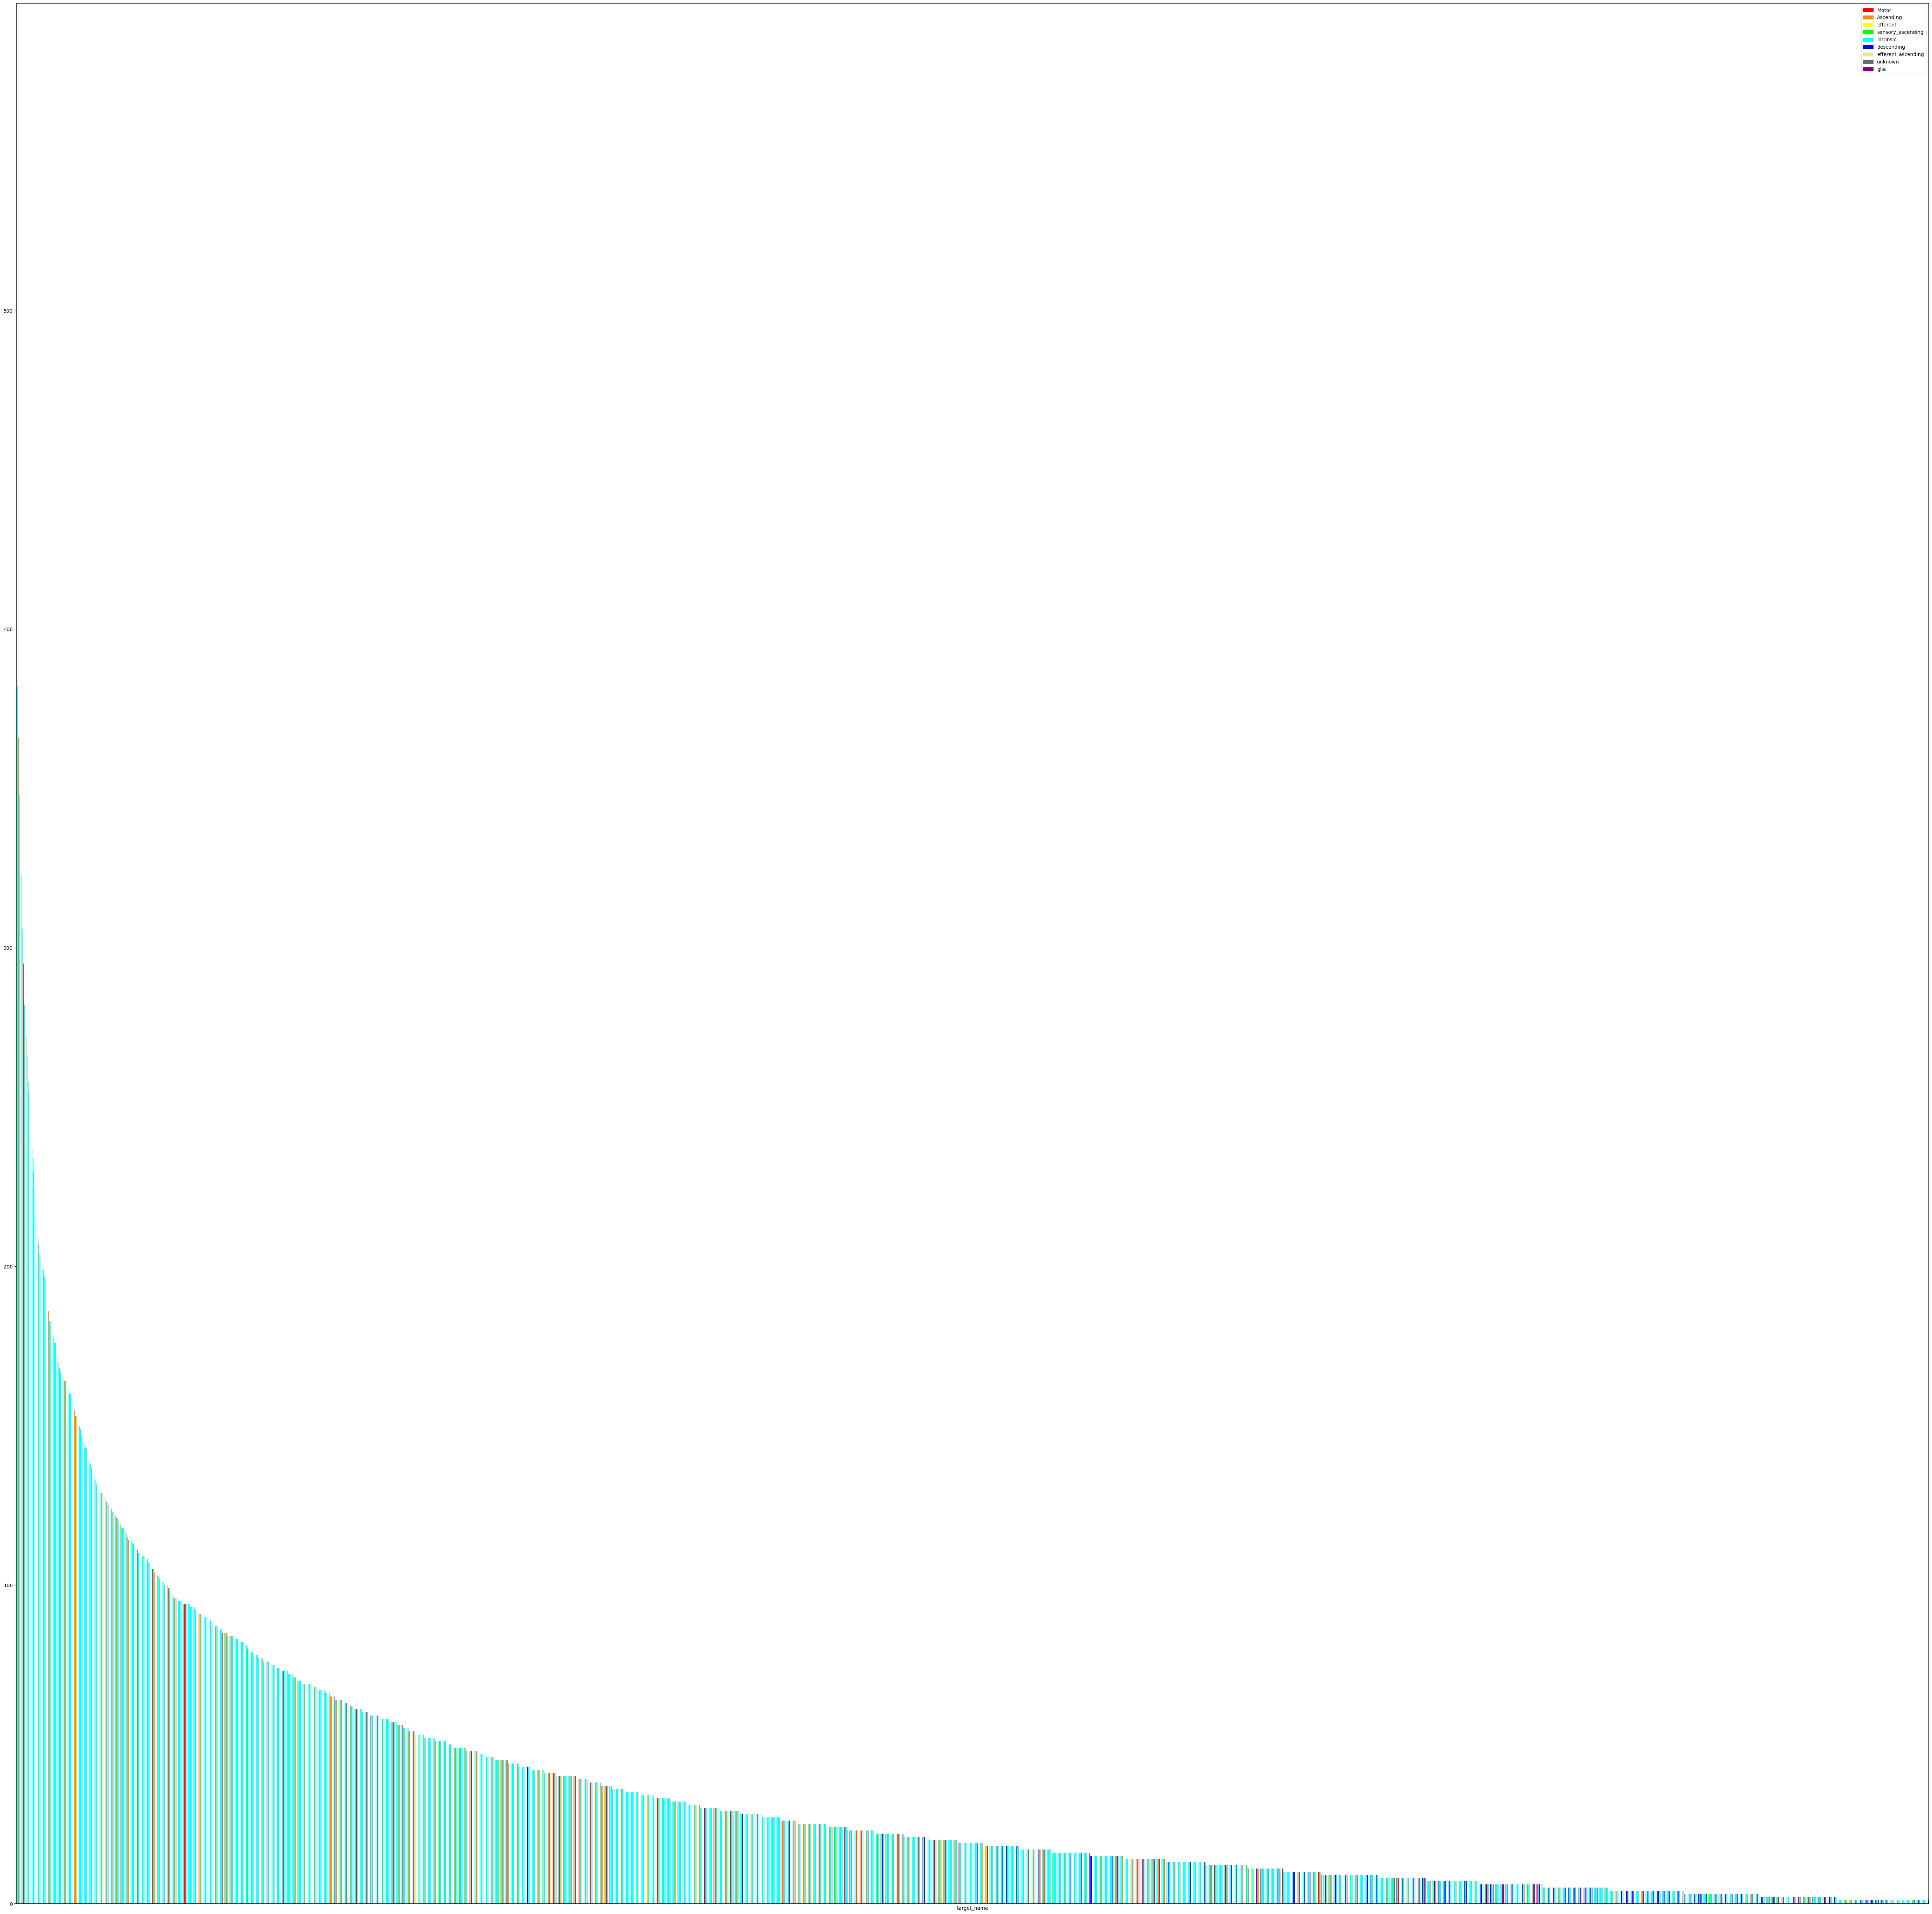

In [5]:
p = utils.plot_target_count(df)

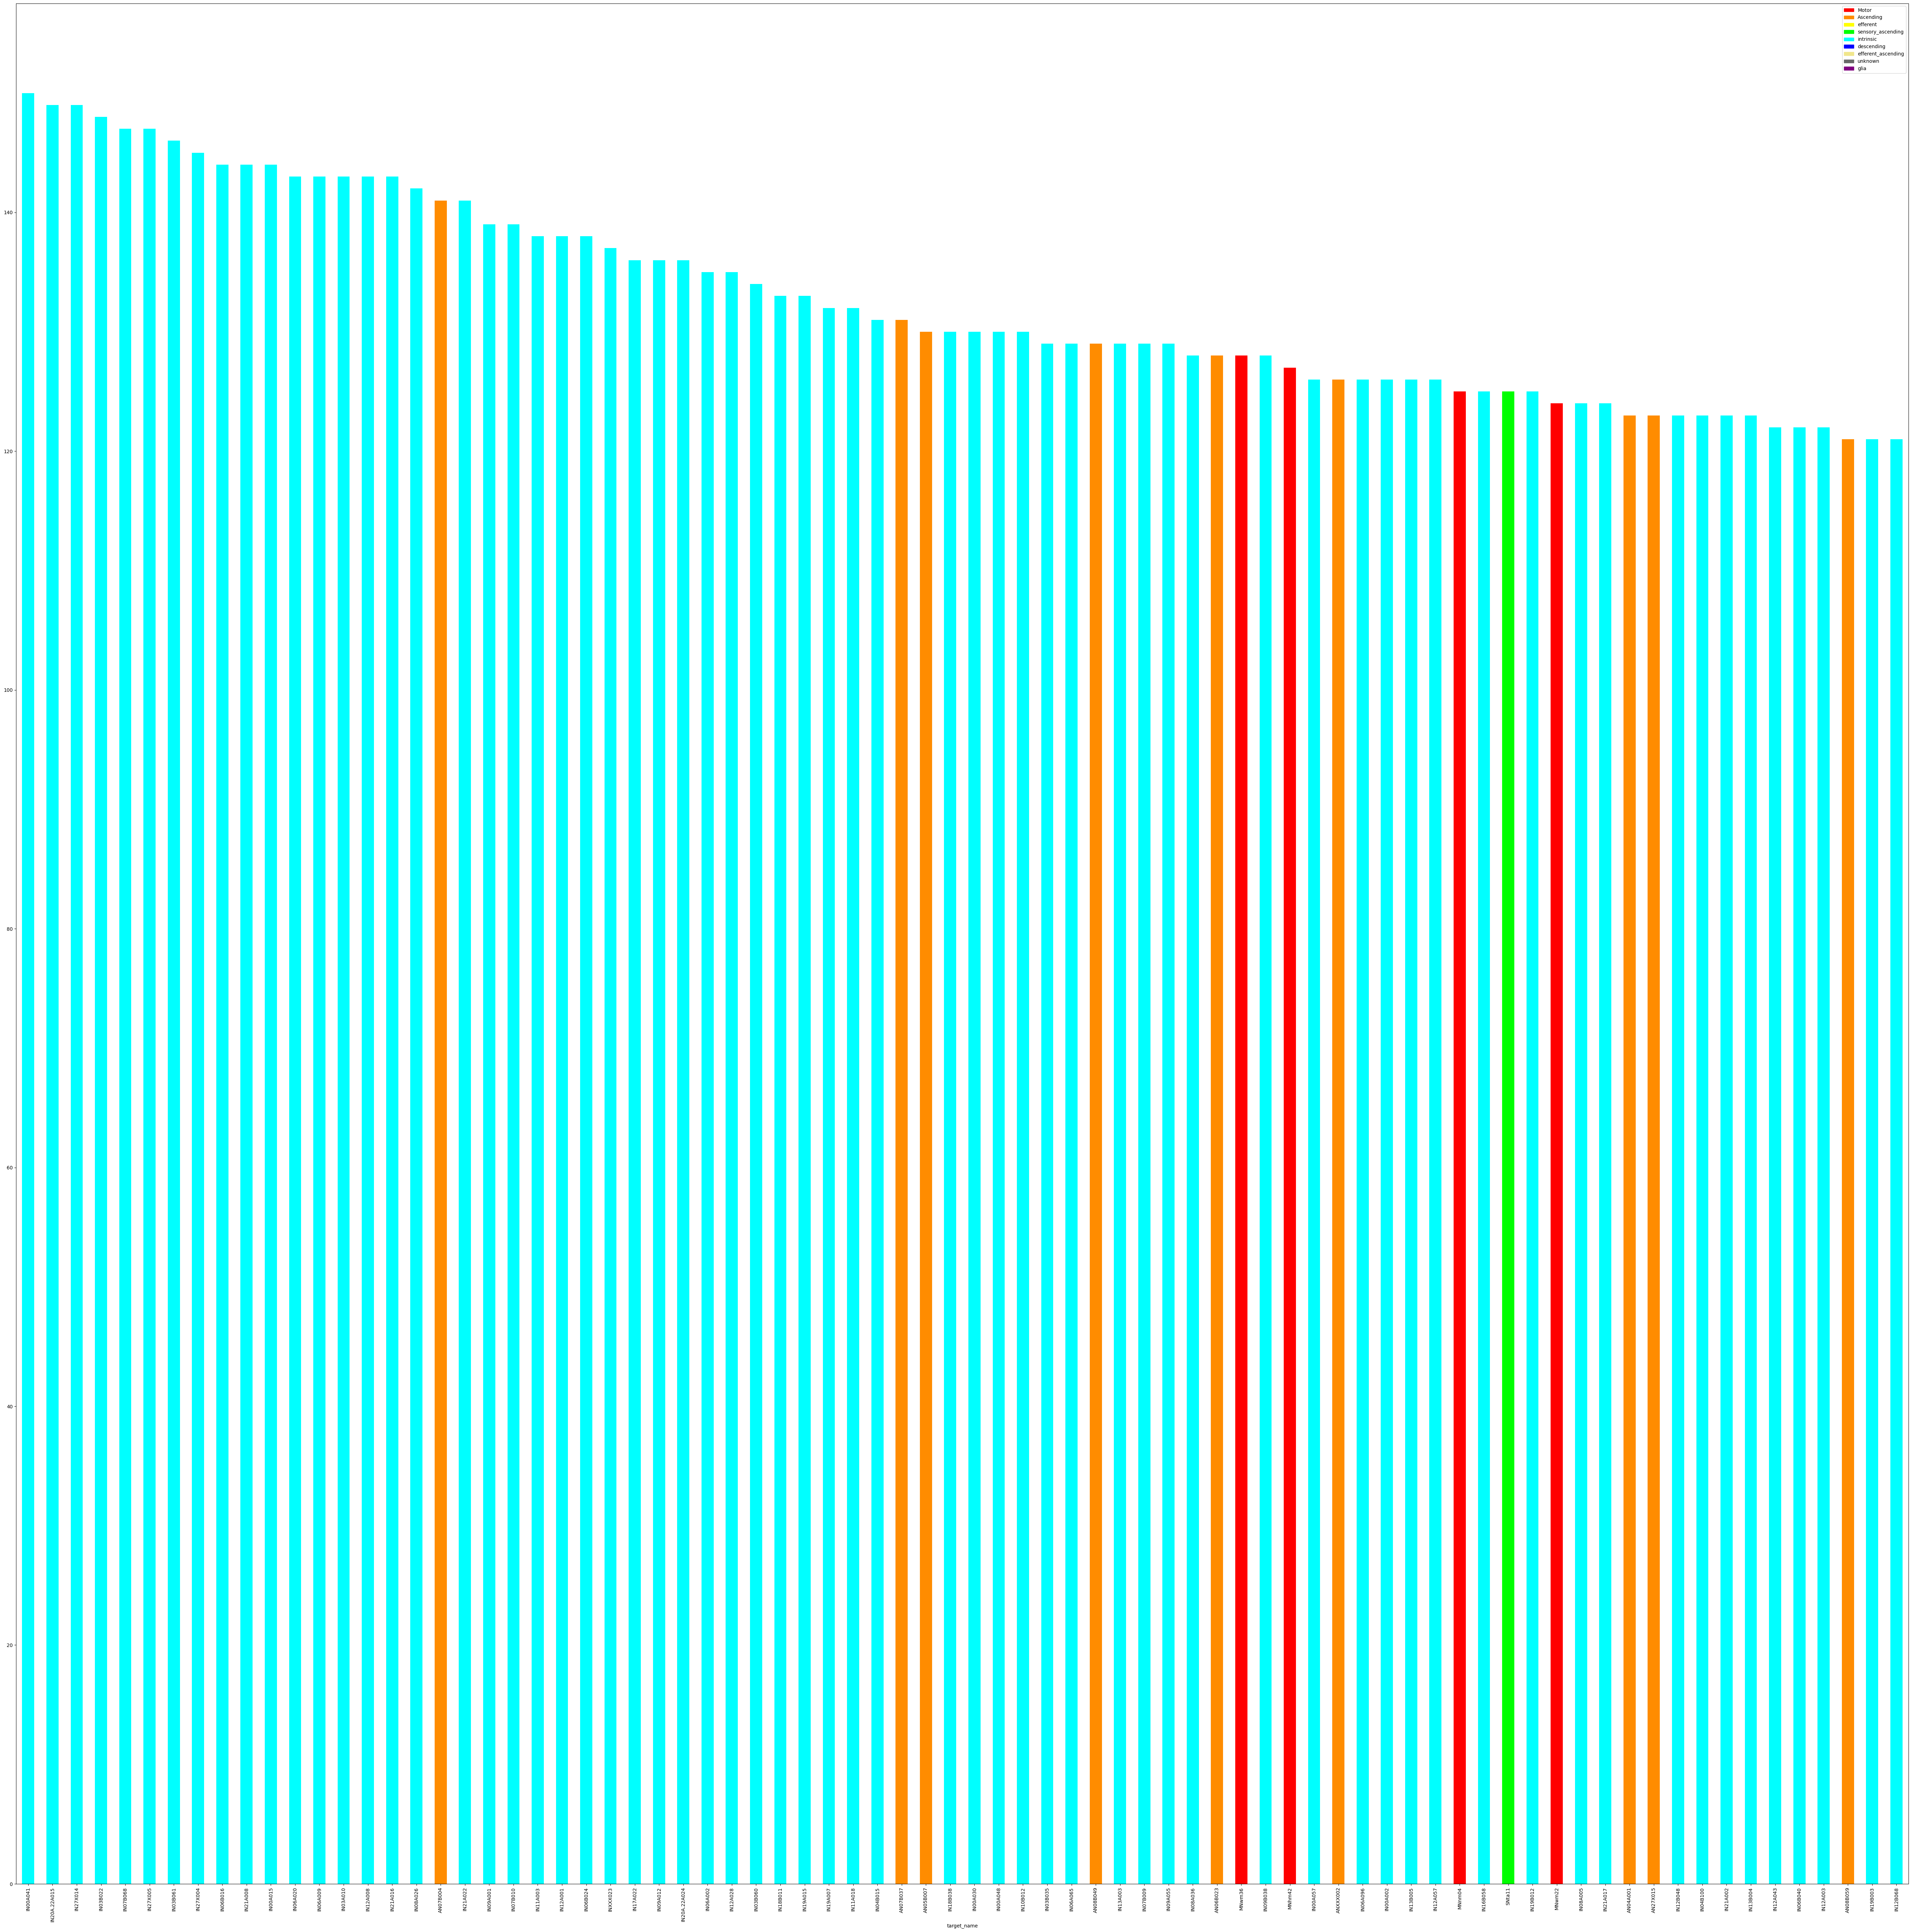

In [4]:
#You can specify lower or/and upper bounds to target a specific range, and can display names (don't recommend it when plotting a lot of data, it'll get messy)
p = utils.plot_target_count(df,upper_bound=150,lower_bound=120,show_name=True)

2.5 Saving plots

It's easier to see the plot when in .png so that you can open it and zoom it. The next cell is to show how to save the plots.

In [5]:
#All functions of plotting a plot p
p.get_figure().savefig("exemple.png")